# Exercise 9 Solution: Non-Parametric Testing with the Mann–Whitney U and Permutation Tests
In this exercise, we explore essential non-parametric methods for comparing independent samples in neuroscience research. These approaches are ideal when assumptions of normality, homogeneity of variance, or interval-scale data are not met—common scenarios in EEG, ERP, and behavioral studies with small or noisy samples.

Specifically, we will:

1. The Mann–Whitney U Test for Independent Groups: Learn how the Mann–Whitney U test evaluates whether one group tends to have higher values than another. Unlike the t-test, it does not assume normal distributions and can be applied to ordinal data or skewed interval data. We'll apply this to compare alpha power levels between two experimental conditions in an EEG study.

2. Random Permutation Test for Exact Inference: Use the random permutation test to evaluate the null hypothesis by simulating the distribution of the test statistic under all possible random reassignments of group labels. This method is particularly useful for small samples, where exact p-values can be calculated. We demonstrate this by comparing reaction times between two randomized groups in a behavioral experiment.

3. Non-Random (Exhaustive) Permutation Test: Explore how the non-random permutation test systematically evaluates all possible allocations of participants to conditions, providing an exact distribution of the test statistic under the null hypothesis. This test is ideal when the total number of permutations is manageable (e.g.,$\binom{6}{3} = 20$ possible groupings). We'll use this to evaluate whether observed differences in alpha power between EEG conditions are statistically significant.

4. Why Non-Parametric? Compare parametric tests like the independent-samples t-test with non-parametric alternatives. Understand why the Mann–Whitney U and permutation tests offer better robustness for data that are non-normally distributed or contain outliers, and how they allow valid inference without assuming equal variances or linear relationships.

5. Interpreting Non-Parametric Test Results: Learn how to interpret output from Mann–Whitney U and permutation tests in Python, including test statistics, p-values, and visualizations of permutation distributions. Gain practice in making data-driven decisions about hypothesis testing when standard parametric methods are not appropriate.

By the end of this exercise, you’ll be able to confidently apply non-parametric hypothesis tests for independent group comparisons using the Mann–Whitney U test and permutation methods. You’ll also understand the conceptual and practical benefits of these techniques for analyzing neuroscience data that do not meet classical statistical assumptions.


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
import itertools


## Exercise 1: Mann–Whitney U Test

In [157]:
# Define the data
group_A = np.array([5.1, 6.2, 5.8, 6.0, 5.5])  # Healthy
group_B = np.array([4.3, 3.9, 4.1, 3.7, 4.0])  # ADHD

In [158]:
# Mann–Whitney U Test (two-sided)
u_stat, p_val = mannwhitneyu(group_B, group_A, alternative='two-sided')

print(f"U statistic: {u_stat}")
print(f"P-value: {p_val:.4f}")


U statistic: 0.0
P-value: 0.0079


In [159]:
# Manual ranking (optional)
from scipy.stats import rankdata
all_data = np.concatenate([group_A, group_B])
ranks = rankdata(all_data)
group_labels = ['A'] * len(group_A) + ['B'] * len(group_B)

print("\nRanks:")
for val, group, rank in sorted(zip(all_data, group_labels, ranks)):
    print(f"Value: {val:.1f}, Group: {group}, Rank: {rank}")


Ranks:
Value: 3.7, Group: B, Rank: 1.0
Value: 3.9, Group: B, Rank: 2.0
Value: 4.0, Group: B, Rank: 3.0
Value: 4.1, Group: B, Rank: 4.0
Value: 4.3, Group: B, Rank: 5.0
Value: 5.1, Group: A, Rank: 6.0
Value: 5.5, Group: A, Rank: 7.0
Value: 5.8, Group: A, Rank: 8.0
Value: 6.0, Group: A, Rank: 9.0
Value: 6.2, Group: A, Rank: 10.0


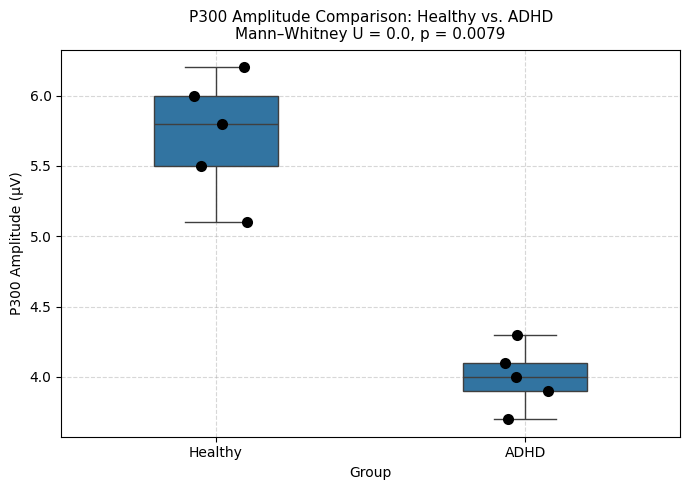

In [160]:
# Combine data for plotting
data = pd.DataFrame({
    'P300 Amplitude (µV)': np.concatenate([group_A, group_B]),
    'Group': ['Healthy'] * len(group_A) + ['ADHD'] * len(group_B)
})

# Create the plot
plt.figure(figsize=(7, 5))
sns.boxplot(x='Group', y='P300 Amplitude (µV)', data=data, width=0.4)
sns.stripplot(x='Group', y='P300 Amplitude (µV)', data=data, color='black', size=8, jitter=True)

# Annotate U statistic and p-value
# plt.title('P300 Amplitude Comparison: Healthy vs. ADHD')
plt.text(0.5, max(data['P300 Amplitude (µV)']) + 0.2,
         f"P300 Amplitude Comparison: Healthy vs. ADHD\nMann–Whitney U = {u_stat:.1f}, p = {p_val:.4f}",
         ha='center', fontsize=11)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Final interpretation

* U = 0 → The minimum possible U → Maximal separation between groups

* p = 0.0079 → Statistically significant difference

* The healthy group shows higher P300 amplitudes than the ADHD group, consistent with attentional processing deficits in ADHD.

## Example 2: Exercise 2: Random Permutation Test

In [161]:
# Simulated accuracy data for 2 groups (values between 0 and 1)
np.random.seed(42)
# group_A = np.random.normal(loc=0.78, scale=0.05, size=15)  # Placebo (loc=0.75)
# group_B = np.random.normal(loc=0.82, scale=0.04, size=15)  # Drug
group_A = np.random.gamma(shape=0.65, scale=0.05, size=15)  # Placebo
group_B = np.random.gamma(shape=0.82, scale=0.04, size=15)  # Drug (scale=0.4/0.2)

# 1. Compute observed mean difference (Drug - Placebo)
observed_diff = np.mean(group_B) - np.mean(group_A)
print(f"Observed difference in mean accuracy: {np.abs(observed_diff):.4f}")


Observed difference in mean accuracy: 0.0183


In [162]:
# 2. Combine both groups
combined = np.concatenate([group_A, group_B])
n_A = len(group_A)
n_permutations = 1000
perm_diffs = []
# 3–4. Run permutations
for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_A = combined[:n_A]
    perm_B = combined[n_A:]
    diff = np.mean(perm_B) - np.mean(perm_A)
    perm_diffs.append(diff)

In [163]:
# 5. Compute two-tailed p-value
perm_diffs = np.array(perm_diffs)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"P-value from permutation test: {p_value}")

P-value from permutation test: 0.233


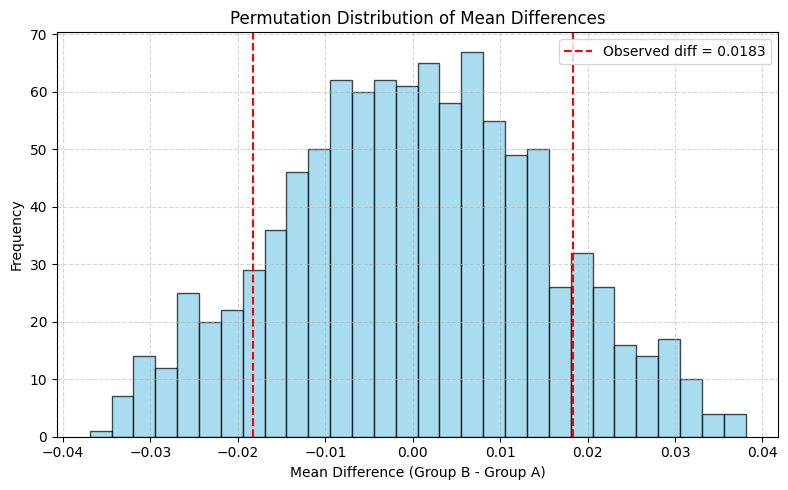

In [164]:
# Plot the permutation distribution
plt.figure(figsize=(8, 5))
plt.hist(perm_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed diff = {observed_diff:.4f}')
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title('Permutation Distribution of Mean Differences')
plt.xlabel('Mean Difference (Group B - Group A)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  Interpretation

* If $p < 0.05$: the difference is **statistically significant**, suggesting the drug may improve working memory accuracy.
* If $p \geq 0.05$: the observed difference could plausibly occur by chance

## Exercise 3: Non-Random Permutation Test

In [165]:
# 1. Original data
alpha_power = np.array([8.2, 7.9, 9.1, 6.8, 7.5, 8.6])
participants = np.array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])

# 2. Observed group assignment
group1_idx = [0, 4, 3]  # P1, P2, P3
group2_idx = [2, 1, 5]  # P4, P5, P6

group1 = alpha_power[group1_idx]
group2 = alpha_power[group2_idx]

# 3. Observed difference in means
observed_diff = np.mean(group1) - np.mean(group2)
print(f"Observed mean difference (Condition 1 - Condition 2): {np.abs(observed_diff):.4f}")


Observed mean difference (Condition 1 - Condition 2): 1.0333


In [166]:
# 4. All combinations of 3 out of 6 participants
indices = np.arange(6)
perms = list(itertools.combinations(indices, 3))

# 5. Calculate difference in mean for each permutation
diffs = []
for g1 in perms:
    g2 = list(set(indices) - set(g1))
    m1 = np.mean(alpha_power[list(g1)])
    m2 = np.mean(alpha_power[list(g2)])
    diffs.append(m1 - m2)

diffs = np.array(diffs)

# 6. Count how many are as or more extreme than the observed
extreme_count = np.sum(np.abs(diffs) >= np.abs(observed_diff))
p_value = extreme_count / len(diffs)

print(f"Exact p-value: {p_value:.4f}")


Exact p-value: 0.2000


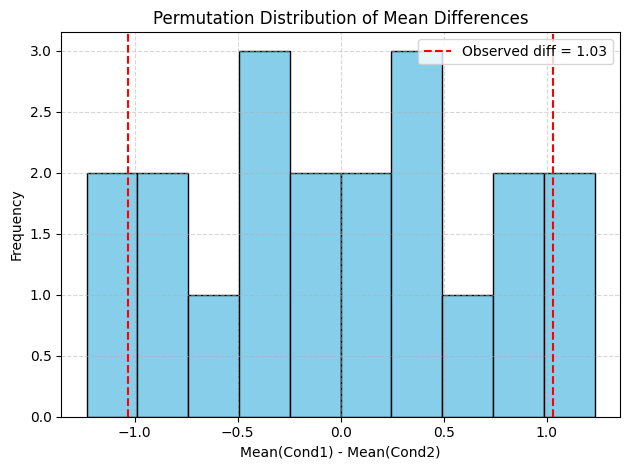

In [168]:
plt.hist(diffs, bins=10, color='skyblue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed diff = {np.abs(observed_diff):.2f}')
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title("Permutation Distribution of Mean Differences")
plt.xlabel("Mean(Cond1) - Mean(Cond2)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Interpretation

* Out of the 20 possible permutations, only 4 yielded a difference in means ≥ 1.033 (the observed value).

* So, $p = 4/20 = 0.20$

* Since $p = 0.2 > 0.05$ we **reject** the null hypothesis. There is no statistically significant evidence of a difference in alpha power between the two conditions based on this data.